# Hamza Omran
# ID: 22011501

# Install library

In [1]:
pip install ucimlrepo

# Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

from sklearn.decomposition import PCA
# for detecting errors
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler  # For handling outliers

# Baseline Model Implementation: Logistic Regression and Dummy Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\dell\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\dell\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\lib\site-packages\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\dell\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\dell\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\lib\site-packages\

AttributeError: _ARRAY_API not found

# fetch dataset

In [3]:
banknote_authentication = fetch_ucirepo(id=267)

# convert to data frame

In [4]:
# Convert features and targets to DataFrame
df_features = pd.DataFrame(banknote_authentication.data.features, columns=banknote_authentication.feature_names)
# df_targets = pd.Series(banknote_authentication.data.targets["class"], name='class')

# Combine into one DataFrame
df = pd.concat([df_features, banknote_authentication.data.targets["class"]], axis=1)

print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [5]:
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


# Initial EDA

## Dataset Overview

- **Instances**: 1372  
- **Features**: 4 continuous features  
- **Target**: `class` (0 = forged, 1 = genuine)  
- **Missing Values**: None


### Banknote Authentication Dataset - Feature Descriptions

- **variance**: Spread of pixel intensities (texture contrast).  
- **skewness**: Asymmetry of pixel intensity distribution.  
- **curtosis**: Sharpness or tail heaviness of the distribution.  
- **entropy**: Randomness or complexity in the image.  
- **class**: Target label — `0` for forged, `1` for genuine banknote.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### We Observe:

- **Feature Variability**:
  - Features such as **variance**, **skewness**, **curtosis**, and **entropy** show a wide range of values, indicating significant diversity in the data distribution.
  - The **mean values** of the features are close to 0, but the **standard deviations** are high, reflecting large variability.
  
- **Feature Skewness and Kurtosis**:
  - The **skewness** and **kurtosis** of some features suggest they might have extreme values or be highly skewed.

- **Class Imbalance**:
  - The dataset has an imbalanced class distribution, with more instances of **class 0 (forged)** compared to **class 1 (genuine)**.



In [7]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Data Preprocessing

## 1-Data Cleaning

* **Handling missing values:**
We can check for null values using `.isnull()` and fill them in using `.fillna()`
* **Removing duplicates:**
We can use `.drop_duplicates()`

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(24)

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

np.int64(0)

# Univariate Analysis

## Plotting Histograms

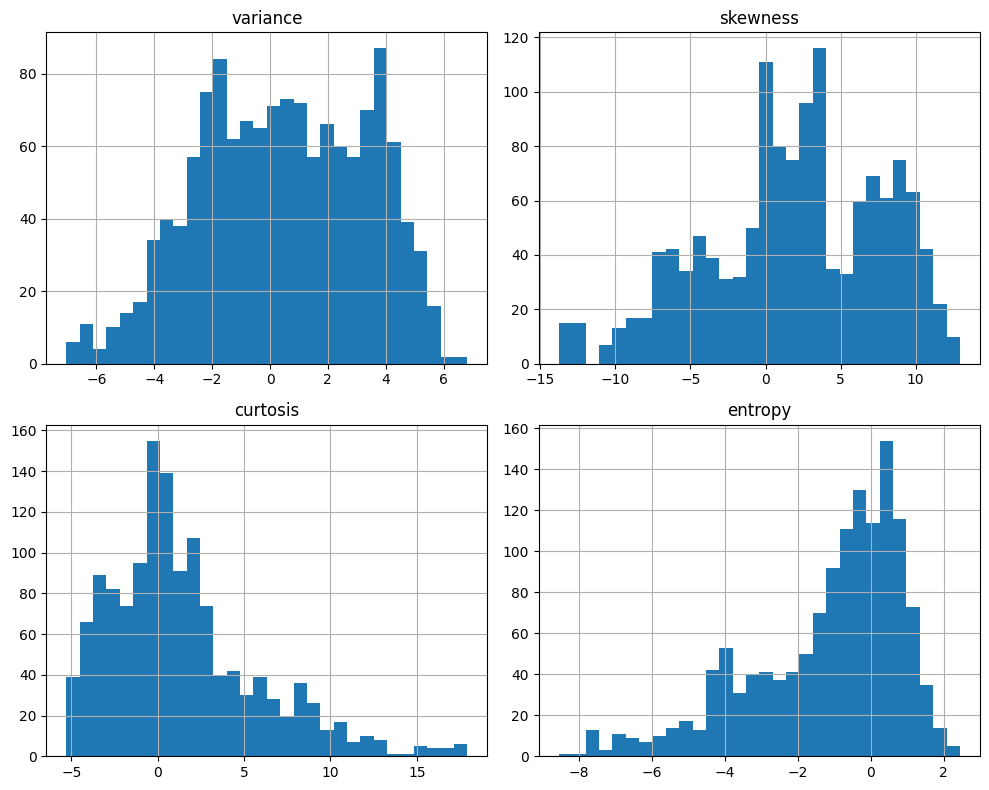

In [12]:
df[['variance', 'skewness', 'curtosis', 'entropy']].hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()



## Boxplots
### decision we won't remove ouliers since they are of metrics of the images and has meaningful info

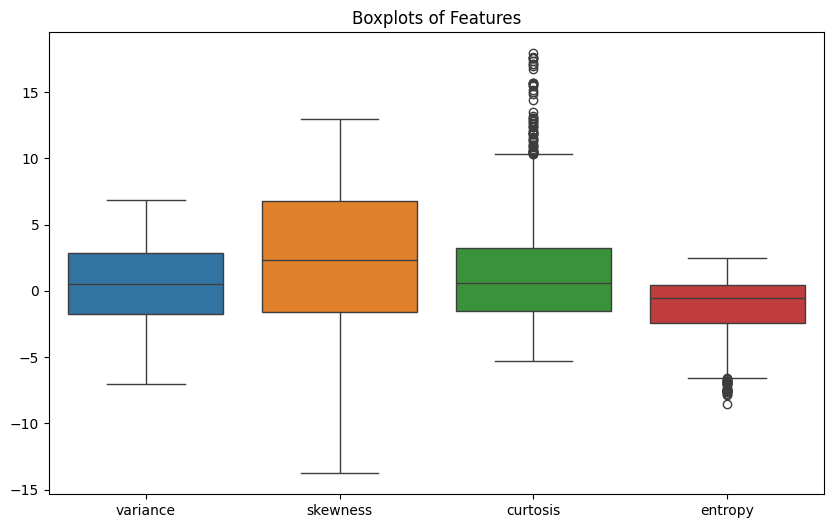

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['variance', 'skewness', 'curtosis', 'entropy']])
plt.title('Boxplots of Features')
plt.show()

## Boxplots

# Bivariate Analysis

## Correlation heatmap

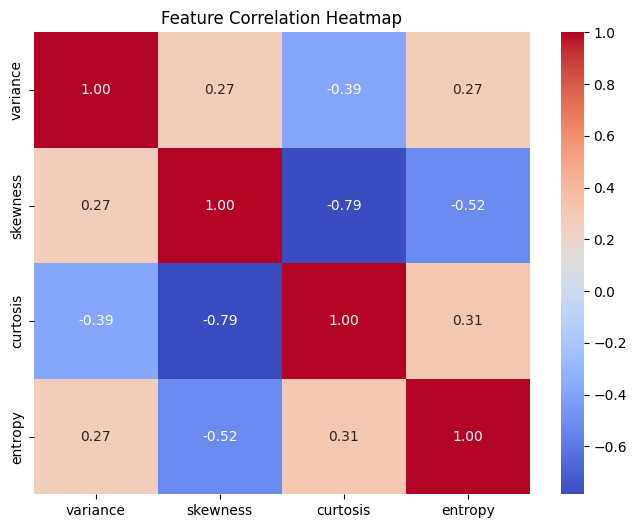

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['variance', 'skewness', 'curtosis', 'entropy']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## Pairplot to see feature relationships


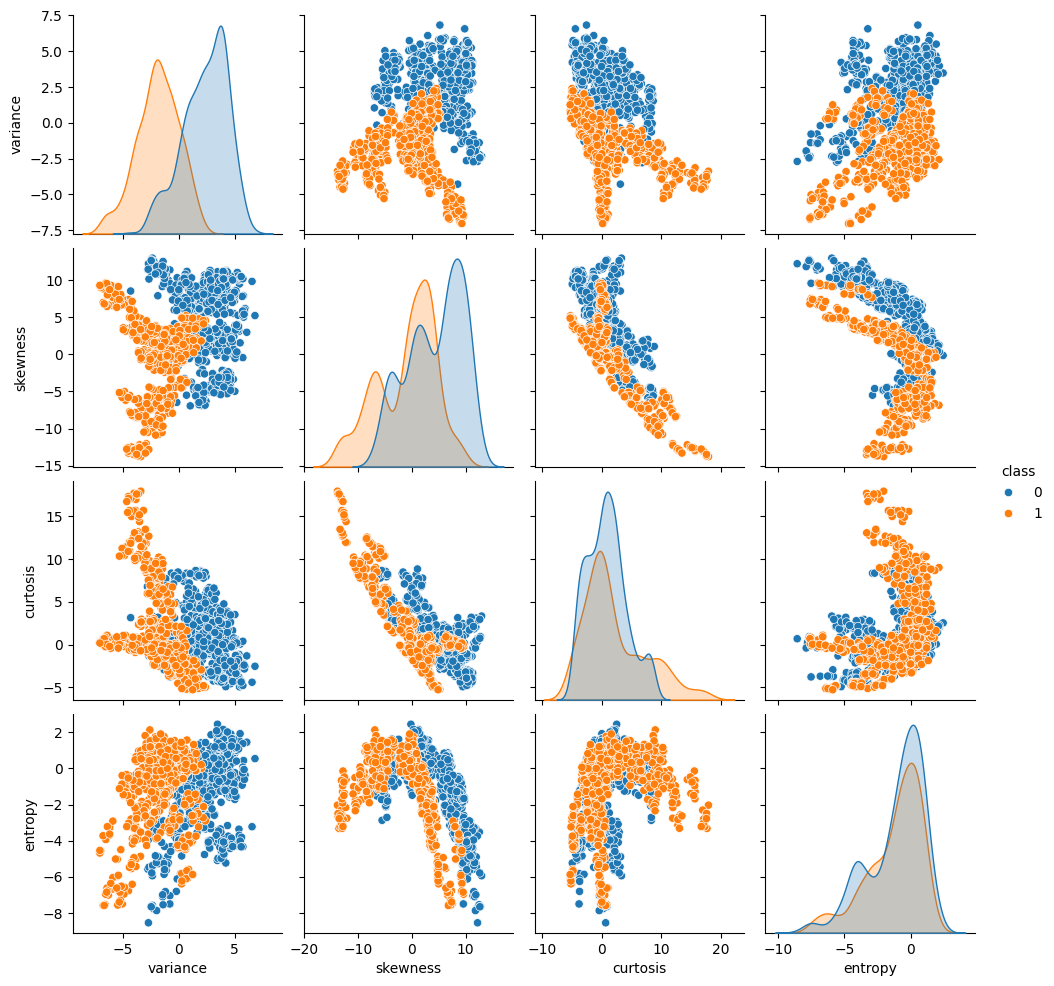

In [15]:
sns.pairplot(df[['variance', 'skewness', 'curtosis', 'entropy', 'class']], hue='class')
plt.show()

## Class Distribution

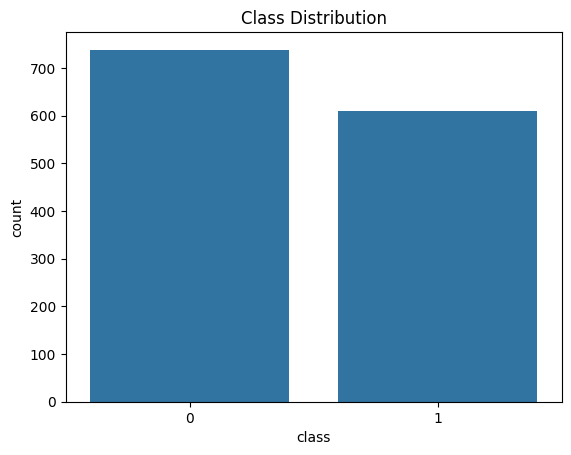

In [16]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

# Multivariate Analysis

## Perform PCA

In [17]:
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(df[['variance', 'skewness', 'curtosis', 'entropy']])

## Plotting the PCA components

In [18]:
# pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
# pca_df['class'] = df['class']

# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', palette='coolwarm')
# plt.title('PCA of Features')
# plt.show()

# df = pca_df

# Outlier Detection

## Calculate Z-scores

In [19]:
z_scores = zscore(df[['variance', 'skewness', 'curtosis', 'entropy']])

## Identify outliers (Z-score > 3 or < -3 is considered an outlier) but we won't do anything since they might be useful indicating a rare banknote or forged one

In [20]:
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Number of outliers in each feature: {outliers}')

Number of outliers in each feature: variance     0
skewness     0
curtosis    19
entropy     15
dtype: int64


# Class Distribution vs Features

## Boxplots of features by class

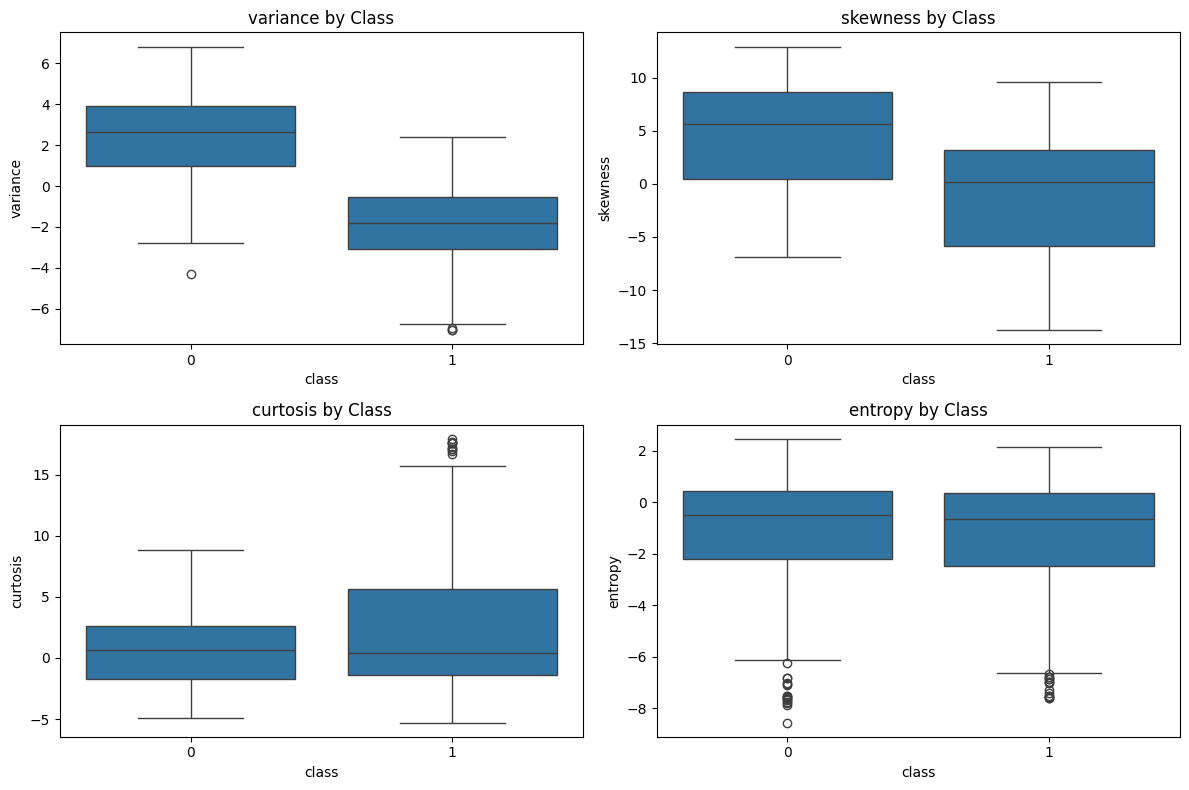

In [21]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['variance', 'skewness', 'curtosis', 'entropy']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()


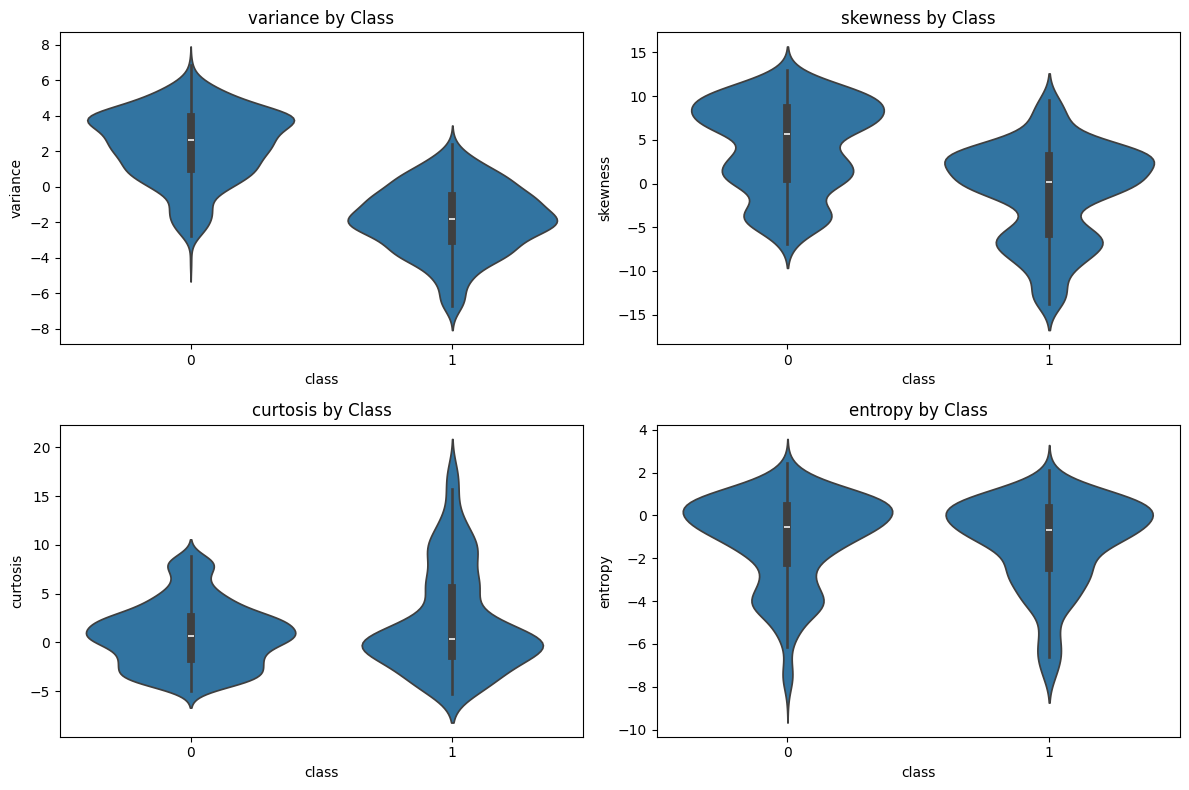

In [22]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['variance', 'skewness', 'curtosis', 'entropy']):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='class', y=feature, data=df)
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()

# Class Imbalance

## Check for class imbalance

In [23]:
class_counts = df['class'].value_counts()
print(f'Class distribution: \n{class_counts}')

Class distribution: 
class
0    738
1    610
Name: count, dtype: int64


# Data Preprocessing

## Standardize the features

In [24]:
scaler = StandardScaler()
df[['variance', 'skewness', 'curtosis', 'entropy']] = scaler.fit_transform(df[['variance', 'skewness', 'curtosis', 'entropy']])

# Dividing the Data into Trainning Set and Testing one

In [25]:
data=df

# Separate features (X) and target (y)
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target variable

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% of data for testing
    random_state=42,     # Seed for reproducibility
    stratify=y           # Preserve class distribution in splits
)

# Optional: Scale features to handle outliers (use training data stats only)
scaler = RobustScaler().fit(X_train)  # Fit scaler on training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply same scaler to test data

# Verify shapes
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)
print("Class distribution in training set:\n", y_train.value_counts())
print("Class distribution in test set:\n", y_test.value_counts())

Training set shape: (1078, 4)
Test set shape: (270, 4)
Class distribution in training set:
 class
0    590
1    488
Name: count, dtype: int64
Class distribution in test set:
 class
0    148
1    122
Name: count, dtype: int64


# Mohammed Rafat

Baseline: Logistic Regression Performance
Accuracy: 0.9851851851851852
Confusion Matrix:


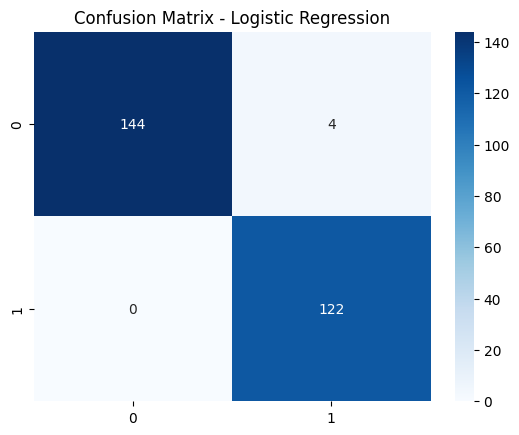

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       148
           1       0.97      1.00      0.98       122

    accuracy                           0.99       270
   macro avg       0.98      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270


Baseline: Dummy Classifier Performance
Accuracy: 0.5481481481481482
Confusion Matrix:


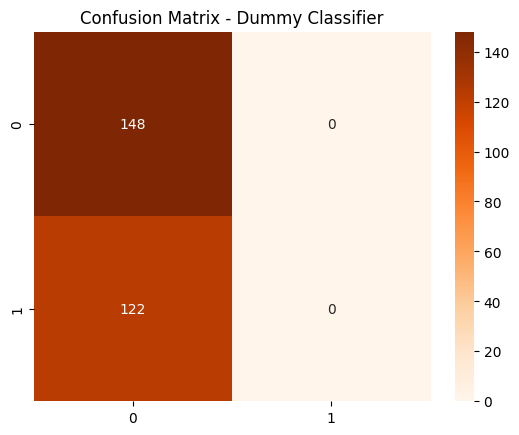

Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71       148
           1       0.00      0.00      0.00       122

    accuracy                           0.55       270
   macro avg       0.27      0.50      0.35       270
weighted avg       0.30      0.55      0.39       270



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Logistic Regression baseline
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

# Dummy Classifier (most frequent class)
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

# Evaluate Logistic Regression
print("Baseline: Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Evaluate Dummy Classifier
print("\nBaseline: Dummy Classifier Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_dummy), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Dummy Classifier")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_dummy))


### Wael Ahmed Rabie Al_naqiti


### 22010290

### SVM With Gradient Descent


Equation of the Hyperplane:

**y = wx - b**

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Support Vector Machine Classifier

In [27]:
class SVM_classifier():

    # initiating the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
        self.train_loss = []
        self.train_accuracy = []
        self.val_loss = []
        self.val_accuracy = []

    # fitting the dataset to SVM Classifier
    def fit(self, X, Y, X_val=None, Y_val=None):
        # m  --> number of Data points --> number of rows
        # n  --> number of input features --> number of columns
        self.m, self.n = X.shape

        # initiating the weight value and bias value
        self.w = np.zeros(self.n)
        self.b = 0

        self.X = X
        self.Y = np.where(Y <= 0, -1, 1)  # label encoding

        # implementing Gradient Descent algorithm for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()

            # Log training loss and accuracy
            train_loss = self.compute_smoothed_hinge_loss(self.X, self.Y)
            train_accuracy = self.compute_accuracy(self.X, self.Y)
            self.train_loss.append(train_loss)
            self.train_accuracy.append(train_accuracy)

            # Log validation loss and accuracy if validation data is provided
            if X_val is not None and Y_val is not None:
                Y_val_encoded = np.where(Y_val <= 0, -1, 1)
                val_loss = self.compute_smoothed_hinge_loss(X_val, Y_val_encoded)
                val_accuracy = self.compute_accuracy(X_val, Y_val_encoded)
                self.val_loss.append(val_loss)
                self.val_accuracy.append(val_accuracy)

    # function for updating the weight and bias value
    def update_weights(self):
        # gradients (dw, db)
        for index, x_i in enumerate(self.X):
            condition = self.Y[index] * (np.dot(x_i, self.w) - self.b) >= 1

            if condition:
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, self.Y[index])
                db = self.Y[index]

            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    # predict the label for a given input value
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        return y_hat

    # compute smoothed hinge loss
    def compute_smoothed_hinge_loss(self, X, Y):
        distances = 1 - Y * (np.dot(X, self.w) - self.b)
        smoothed_distances = np.maximum(0, distances) ** 2  # Smoothed hinge loss
        return np.mean(smoothed_distances) + self.lambda_parameter * np.dot(self.w, self.w)

    # compute accuracy
    def compute_accuracy(self, X, Y):
        predictions = self.predict(X)
        Y_original = np.where(Y == -1, 0, 1)  # Convert back to original labels
        return np.mean(predictions == Y_original)

In [28]:
features = df.drop('class', axis=1)  # Features

target = df['class']

In [29]:
print(features)

      variance  skewness  curtosis   entropy
0     1.109709  1.151820 -0.975529  0.346132
1     1.432683  1.066810 -0.894937 -0.140707
2     1.195109 -0.775147  0.118015  0.611558
3     1.052054  1.297854 -1.253774 -1.163342
4    -0.040724 -1.084859  0.729928  0.086284
...        ...       ...       ...       ...
1367 -0.013853 -0.095431 -0.661853  0.292178
1368 -0.641015 -1.156810  1.170350  0.724425
1369 -1.466217 -2.619593  3.739432 -0.771371
1370 -1.401014 -1.754347  2.537563 -0.054476
1371 -1.043972 -0.437589  0.293666  1.133715

[1348 rows x 4 columns]


In [30]:
print(target)

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1348, dtype: int64


Data Standardization

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(features)

StandardScaler()

In [33]:
standardized_data = scaler.transform(features)

In [34]:
print(standardized_data)

[[ 1.10970929  1.15181957 -0.97552874  0.34613239]
 [ 1.43268284  1.06681036 -0.89493724 -0.14070687]
 [ 1.19510876 -0.77514686  0.11801497  0.61155813]
 ...
 [-1.46621705 -2.61959283  3.73943238 -0.77137116]
 [-1.40101434 -1.75434664  2.53756278 -0.05447612]
 [-1.04397185 -0.43758852  0.29366608  1.13371459]]


In [35]:
features = standardized_data
target = df['class']  # Target variable

In [36]:
print(features)
print(target)

[[ 1.10970929  1.15181957 -0.97552874  0.34613239]
 [ 1.43268284  1.06681036 -0.89493724 -0.14070687]
 [ 1.19510876 -0.77514686  0.11801497  0.61155813]
 ...
 [-1.46621705 -2.61959283  3.73943238 -0.77137116]
 [-1.40101434 -1.75434664  2.53756278 -0.05447612]
 [-1.04397185 -0.43758852  0.29366608  1.13371459]]
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1348, dtype: int64


Train Test Split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)

In [38]:
print(features.shape, X_train.shape, X_test.shape)

(1348, 4) (1078, 4) (270, 4)


Training the Model

Support Vector Machine Classifier

In [39]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

In [40]:
# training the SVM classifier with training data
classifier.fit(X_train, Y_train, X_val=X_test, Y_val=Y_test)


In [41]:
loss_epochs = classifier.train_loss
acc_epochs = classifier.train_accuracy
# validation data
val_loss_epochs = classifier.val_loss
val_acc_epochs = classifier.val_accuracy

In [42]:
for epoch in range(10):
    print(f"Epoch {epoch+1}: "
          f"Train Loss = {loss_epochs[epoch]:.4f}, "
          f"Train Acc = {acc_epochs[epoch]:.4f}", end="")
    if val_loss_epochs and val_acc_epochs:  # Check if validation lists are not empty
        print(f", Val Loss = {val_loss_epochs[epoch]:.4f}, "
              f"Val Acc = {val_acc_epochs[epoch]:.4f}")
    else:
        print()

Epoch 1: Train Loss = 0.3859, Train Acc = 0.8729, Val Loss = 0.3400, Val Acc = 0.9000
Epoch 2: Train Loss = 0.2666, Train Acc = 0.9202, Val Loss = 0.2167, Val Acc = 0.9407
Epoch 3: Train Loss = 0.1910, Train Acc = 0.9518, Val Loss = 0.1506, Val Acc = 0.9593
Epoch 4: Train Loss = 0.1416, Train Acc = 0.9666, Val Loss = 0.1112, Val Acc = 0.9815
Epoch 5: Train Loss = 0.1164, Train Acc = 0.9796, Val Loss = 0.0925, Val Acc = 0.9889
Epoch 6: Train Loss = 0.1045, Train Acc = 0.9833, Val Loss = 0.0832, Val Acc = 0.9926
Epoch 7: Train Loss = 0.0981, Train Acc = 0.9852, Val Loss = 0.0778, Val Acc = 0.9963
Epoch 8: Train Loss = 0.0949, Train Acc = 0.9870, Val Loss = 0.0754, Val Acc = 0.9963
Epoch 9: Train Loss = 0.0933, Train Acc = 0.9879, Val Loss = 0.0744, Val Acc = 0.9963
Epoch 10: Train Loss = 0.0926, Train Acc = 0.9879, Val Loss = 0.0736, Val Acc = 0.9963


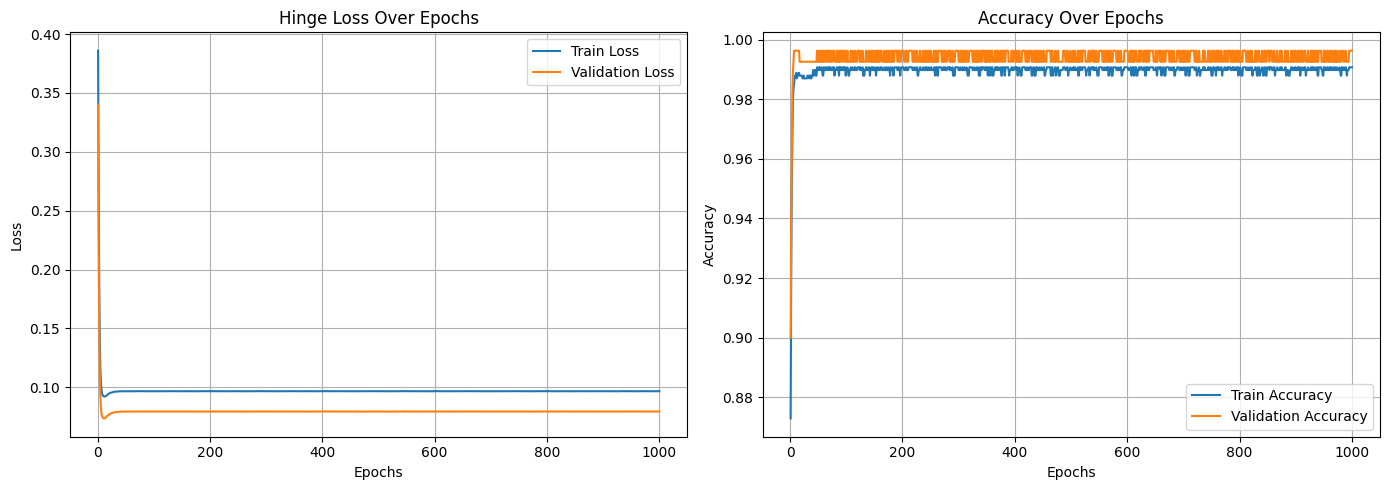

In [43]:
# Ensure the lengths of training and validation metrics are consistent
min_epochs = min(len(loss_epochs), len(val_loss_epochs), len(acc_epochs), len(val_acc_epochs))

# Adjust epochs range to match the minimum length
epochs = range(1, min_epochs + 1)

plt.figure(figsize=(14, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_epochs[:min_epochs], label='Train Loss')
plt.plot(epochs, val_loss_epochs[:min_epochs], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Hinge Loss Over Epochs")
plt.legend()
plt.grid(True)

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_epochs[:min_epochs], label='Train Accuracy')
plt.plot(epochs, val_acc_epochs[:min_epochs], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Model Evaluation

Accuracy Score

In [44]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [45]:
print('Accuracy score on training data = ', training_data_accuracy)

Accuracy score on training data =  0.9907235621521335


In [46]:
# accuracy on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [47]:
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on test data =  0.9962962962962963


In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Confusion Matrix for training data
train_cm = confusion_matrix(Y_train, X_train_prediction)
print("Confusion Matrix - Training Data:")
print(train_cm)

# Confusion Matrix for test data
test_cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix - Test Data:")
print(test_cm)
class_report = classification_report(Y_test, X_test_prediction)
print("Classification Report:")
print(class_report)


Confusion Matrix - Training Data:
[[590  10]
 [  0 478]]
Confusion Matrix - Test Data:
[[137   1]
 [  0 132]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       138
           1       0.99      1.00      1.00       132

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



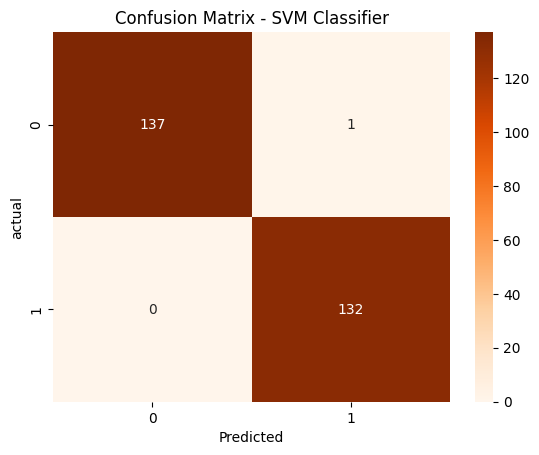

In [49]:
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.show()


##  SVM with Subgradient Descent
,**Name:** معاذ مصطفى عبدالحميد مصطفى  **ID:** 22010263

### Step 1: Convert Labels to {-1, 1}

In [50]:
df['class'] = df['class'].apply(lambda x: 1 if x == 1 else -1)

### Step 2: Split the Dataset into Training and Validation Sets

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1).values
y = df['class'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 3: Define SVM Class Using Subgradient Descent

In [52]:
import numpy as np

class SVM_SubGD:
    def __init__(self, lr=0.001, lambda_param=0.0005, n_epochs=1000, batch_size=None):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_epochs = n_epochs
        self.batch_size = batch_size

    def fit(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        self.train_loss = []
        self.train_acc = []
        self.val_loss = []
        self.val_acc = []

        for epoch in range(self.n_epochs):
            if self.batch_size:
                # Mini-batch Gradient Descent
                indices = np.random.permutation(n_samples)  # Shuffle indices
                for i in range(0, n_samples, self.batch_size):
                    batch_indices = indices[i:i + self.batch_size]
                    X_batch, y_batch = X[batch_indices], y[batch_indices]
                    self._update_weights(X_batch, y_batch)
            else:
                # Full Batch Gradient Descent (Slow but accurate)
                self._update_weights(X, y)

            # Compute training and validation loss & accuracy after the update
            train_pred = self.predict(X)
            val_pred = self.predict(X_val)

            train_loss = self._hinge_loss(X, y)
            val_loss = self._hinge_loss(X_val, y_val)
            train_accuracy = self._accuracy(y, train_pred)
            val_accuracy = self._accuracy(y_val, val_pred)

            self.train_loss.append(train_loss)
            self.val_loss.append(val_loss)
            self.train_acc.append(train_accuracy)
            self.val_acc.append(val_accuracy)

    def _update_weights(self, X, y):
        # Vectorized weight update
        margin = y * (np.dot(X, self.w) + self.b)
        mask = margin < 1
        dw = self.lambda_param * self.w - np.dot(X.T, y * mask)
        db = -np.sum(y * mask)
        
        # Update weights and bias
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

    def _hinge_loss(self, X, y):
        # Compute hinge loss
        margin = 1 - y * (np.dot(X, self.w) + self.b)
        loss = np.maximum(0, margin)
        return np.mean(loss) + self.lambda_param * np.dot(self.w, self.w)

    def _accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)



### Step 4: Train the Subgradient SVM Model

In [53]:
model = SVM_SubGD(lambda_param=0.0005, n_epochs=1000, batch_size=64)

model.fit(X_train, y_train, X_val, y_val)

loss_epochs = model.train_loss
acc_epochs = model.train_acc
val_loss_epochs = model.val_loss
val_acc_epochs = model.val_acc


In [54]:
for epoch in range(10):
    print(f"Epoch {epoch+1}: "
          f"Train Loss = {loss_epochs[epoch]:.4f}, "
          f"Train Acc = {acc_epochs[epoch]:.4f}, "
          f"Val Loss = {val_loss_epochs[epoch]:.4f}, "
          f"Val Acc = {val_acc_epochs[epoch]:.4f}")


Epoch 1: Train Loss = 0.4350, Train Acc = 0.8794, Val Loss = 0.4129, Val Acc = 0.8889
Epoch 2: Train Loss = 0.2964, Train Acc = 0.9230, Val Loss = 0.2844, Val Acc = 0.9407
Epoch 3: Train Loss = 0.2189, Train Acc = 0.9629, Val Loss = 0.2155, Val Acc = 0.9593
Epoch 4: Train Loss = 0.1617, Train Acc = 0.9777, Val Loss = 0.1619, Val Acc = 0.9778
Epoch 5: Train Loss = 0.1243, Train Acc = 0.9861, Val Loss = 0.1302, Val Acc = 0.9852
Epoch 6: Train Loss = 0.1031, Train Acc = 0.9879, Val Loss = 0.1132, Val Acc = 0.9852
Epoch 7: Train Loss = 0.0898, Train Acc = 0.9889, Val Loss = 0.1012, Val Acc = 0.9852
Epoch 8: Train Loss = 0.0807, Train Acc = 0.9898, Val Loss = 0.0940, Val Acc = 0.9852
Epoch 9: Train Loss = 0.0737, Train Acc = 0.9898, Val Loss = 0.0867, Val Acc = 0.9852
Epoch 10: Train Loss = 0.0683, Train Acc = 0.9898, Val Loss = 0.0828, Val Acc = 0.9815


## accuracy

In [55]:
np.mean(val_acc_epochs)

np.float64(0.991922222222222)

In [56]:
from sklearn.metrics import confusion_matrix

# Step 1: Predict on validation set
y_val_pred = model.predict(X_val)

# Step 2: Print confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[145   2]
 [  0 123]]


### Step 5: Visualize Loss and Accuracy Over Epochs

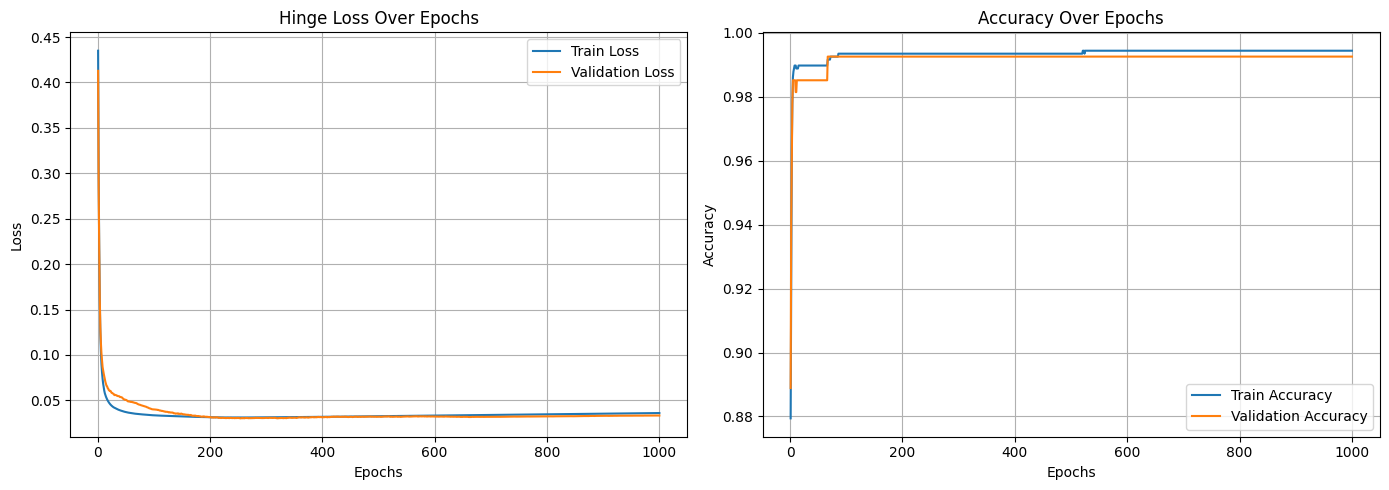

In [57]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss_epochs) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_epochs, label='Train Loss')
plt.plot(epochs, val_loss_epochs, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Hinge Loss Over Epochs")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_epochs, label='Train Accuracy')
plt.plot(epochs, val_acc_epochs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# name: Aly Eldin Yasser

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

def train_and_tune(model_class, X_train, y_train, X_val, y_val,
                   learning_rates, batch_sizes, epochs=1000, use_subgd=True):
    best_models = {}
    tuning_results = []

    for lr in learning_rates:
        for batch_size in batch_sizes:
            print(f"\nTraining with learning rate: {lr}, batch size: {batch_size}")
            model = model_class(lr=lr, lambda_param=0.01, n_epochs=epochs, batch_size=batch_size)
            model.fit(X_train, y_train, X_val=X_val, y_val=y_val)

            val_loss = model.val_loss[-1]
            val_acc = model.val_acc[-1]

            tuning_results.append({
                'Model': 'SubGD' if use_subgd else 'GD',
                'Learning Rate': lr,
                'Batch Size': batch_size,
                'Val Accuracy': val_acc,
                'Final Val Loss': val_loss,
                'Epochs Trained': epochs
            })

            best_models[(lr, batch_size)] = (model, val_acc)

    return pd.DataFrame(tuning_results), best_models





In [59]:
# Define learning rates and settings
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.0005]
epochs = 1000
batch  = [8, 16, 32,64]

# Perform tuning
print("Tuning Subgradient Descent (SVM_SubGD)...")
subgd_results, subgd_models = train_and_tune(
    SVM_SubGD, X_train, y_train, X_val, y_val,
    learning_rates, batch, epochs
)

subgd_results = subgd_results.sort_values(by=['Val Accuracy', 'Final Val Loss'], ascending=[False, True])

# Show tuning results
print("\nTuning Results (Subgradient Descent):")
display(subgd_results)

# Sort by Validation Accuracy (highest) and then by Validation Loss (lowest)
best_row = subgd_results.iloc[0]

# Extract the best learning rate and batch size
best_subgd_lr = best_row['Learning Rate']
best_batch_size = best_row['Batch Size']

# Print the best learning rate and batch size
print(f"\nBest Learning Rate for SubGD: {best_subgd_lr}")
print(f"Best Batch Size for SubGD: {best_batch_size}")


Tuning Subgradient Descent (SVM_SubGD)...

Training with learning rate: 0.001, batch size: 8

Training with learning rate: 0.001, batch size: 16

Training with learning rate: 0.001, batch size: 32

Training with learning rate: 0.001, batch size: 64

Training with learning rate: 0.005, batch size: 8

Training with learning rate: 0.005, batch size: 16

Training with learning rate: 0.005, batch size: 32

Training with learning rate: 0.005, batch size: 64

Training with learning rate: 0.01, batch size: 8

Training with learning rate: 0.01, batch size: 16

Training with learning rate: 0.01, batch size: 32

Training with learning rate: 0.01, batch size: 64

Training with learning rate: 0.05, batch size: 8

Training with learning rate: 0.05, batch size: 16

Training with learning rate: 0.05, batch size: 32

Training with learning rate: 0.05, batch size: 64

Training with learning rate: 0.0005, batch size: 8

Training with learning rate: 0.0005, batch size: 16

Training with learning rate: 0.0

,Model,Learning Rate,Batch Size,Val Accuracy,Final Val Loss,Epochs Trained
16,SubGD,0.0005,8,0.992593,0.209487,1000
0,SubGD,0.0010,8,0.992593,0.217860,1000
8,SubGD,0.0100,8,0.992593,0.217994,1000
4,SubGD,0.0050,8,0.992593,0.221596,1000
17,SubGD,0.0005,16,0.992593,0.242880,1000
1,SubGD,0.0010,16,0.992593,0.256177,1000
18,SubGD,0.0005,32,0.992593,0.269318,1000
5,SubGD,0.0050,16,0.992593,0.272370,1000
9,SubGD,0.0100,16,0.992593,0.281402,1000
19,SubGD,0.0005,64,0.992593,0.289147,1000



Best Learning Rate for SubGD: 0.0005
Best Batch Size for SubGD: 8


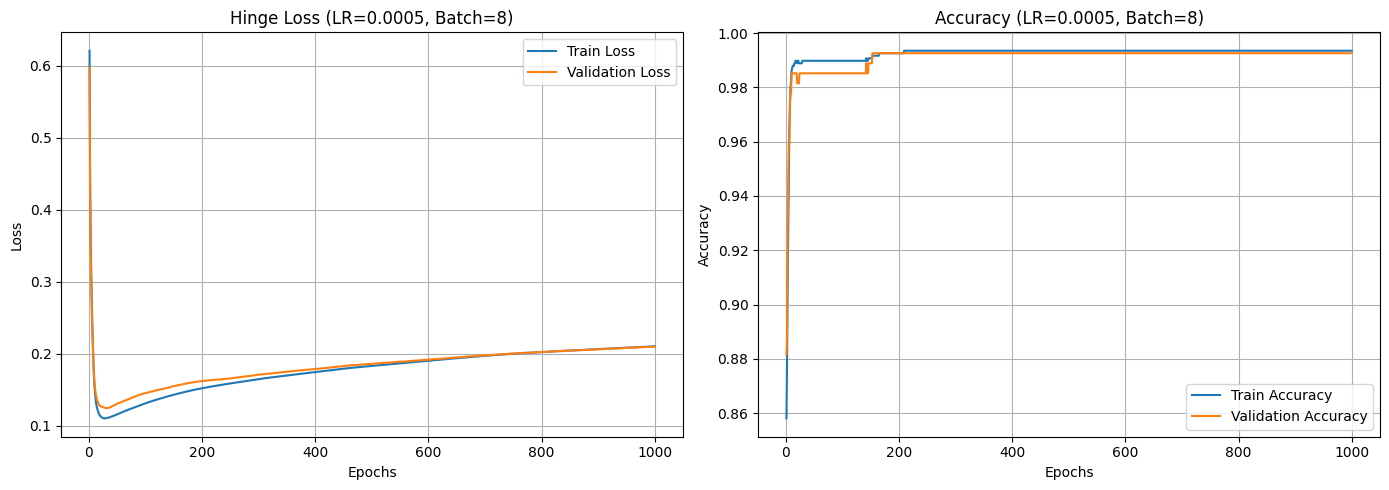

In [60]:
import matplotlib.pyplot as plt

# Get best (learning rate, batch size) combination from results
best_row = subgd_results.sort_values(by='Val Accuracy', ascending=False).iloc[0]
best_lr = best_row['Learning Rate']
best_batch = best_row['Batch Size']

# Retrieve best model using full key
best_model, best_acc = subgd_models[(best_lr, best_batch)]

# Extract training and validation logs
loss_epochs = best_model.train_loss
acc_epochs = best_model.train_acc
val_loss_epochs = best_model.val_loss
val_acc_epochs = best_model.val_acc
epochs = range(1, len(loss_epochs) + 1)

# Plot Loss and Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_epochs, label='Train Loss')
plt.plot(epochs, val_loss_epochs, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Hinge Loss (LR={best_lr}, Batch={best_batch})")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_epochs, label='Train Accuracy')
plt.plot(epochs, val_acc_epochs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title(f"Accuracy (LR={best_lr}, Batch={best_batch})")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Yasser Ashraf Mohammed 22010409

## Modified GD SVM Class with Training History Tracking

In [61]:
# Initialize and train both models with history tracking
gd_model = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)    
gd_model.fit (X_train, y_train, X_val=X_val, Y_val=y_val)  # Your existing GD implementation


In [62]:
# Initialize and train SubGD model with history tracking
subgd_model = SVM_SubGD(lr=0.001, lambda_param=0.01, n_epochs=100)
subgd_model.fit(X_train, y_train, X_val=X_val, y_val=y_val)  # Your existing SubGD implementation

## Visualizations

### 1. Loss and Accuracy Comparison

Text(0.5, 0.01, 'Figure 1: SubGD shows faster convergence but fails on genuine notes (right).GD is slower but more balanced (left).')

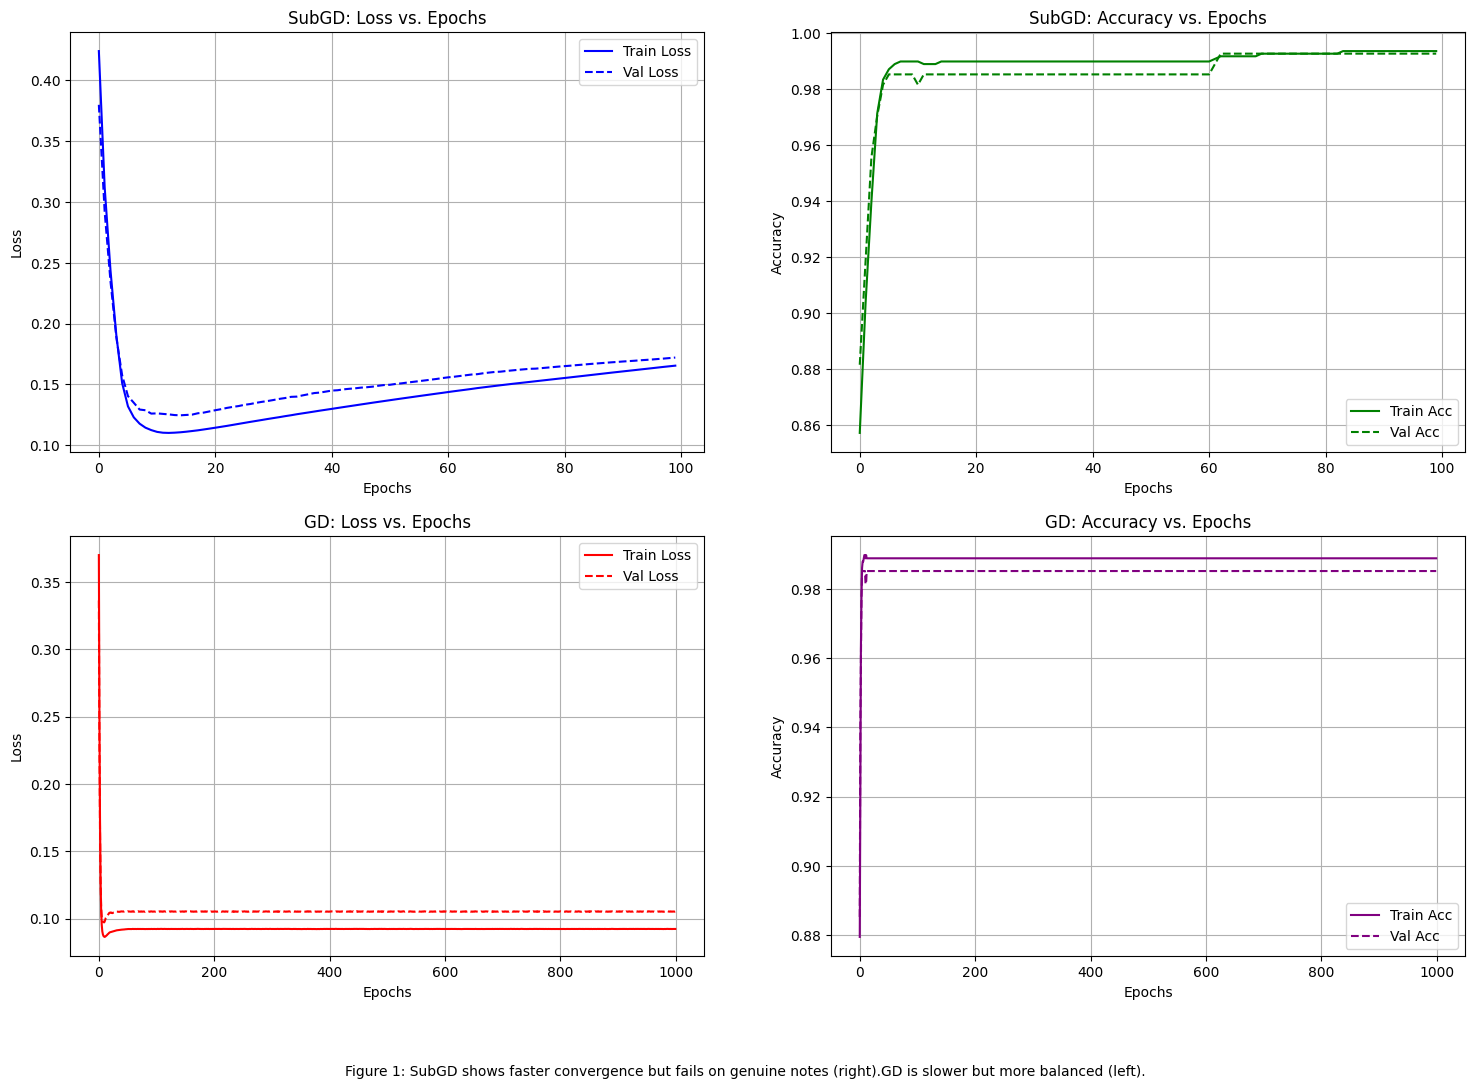

In [63]:
# 1. Loss and Accuracy Comparison
plt.figure(figsize=(18, 12))

# SubGD Plots
plt.subplot(2, 2, 1)
plt.plot(subgd_model.train_loss, label='Train Loss', color='blue')
plt.plot(subgd_model.val_loss, label='Val Loss', color='blue', linestyle='--')
plt.title('SubGD: Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(subgd_model.train_acc, label='Train Acc', color='green')
plt.plot(subgd_model.val_acc, label='Val Acc', color='green', linestyle='--')
plt.title('SubGD: Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# GD Plots
plt.subplot(2, 2, 3)
plt.plot(gd_model.train_loss, label='Train Loss', color='red')
plt.plot(gd_model.val_loss, label='Val Loss', color='red', linestyle='--')
plt.title('GD: Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(gd_model.train_accuracy, label='Train Acc', color='purple')
plt.plot(gd_model.val_accuracy, label='Val Acc', color='purple', linestyle='--')
plt.title('GD: Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.figtext(0.5, 0.01,
    "Figure 1: SubGD shows faster convergence but fails on genuine notes (right).GD is slower but more balanced (left).",
    ha='center', fontsize=10)


### 1. Training Curves Analysis
**SubGD (Subgradient Descent)**
  * **Loss Plot:**

    * Both training and validation loss decrease steadily, indicating the model is learning effectively.

    * No signs of overfitting (validation loss follows training loss closely).

    * Final loss values suggest good convergence (~0.5).

  * **Accuracy Plot:**

    * Training and validation accuracy reach ~98-100% by epoch 100.

    * Rapid improvement in early epochs (0-20), then plateaus.

**GD (Gradient Descent)**
  * **Loss Plot:**

    * Shows slower convergence than SubGD (loss decreases more gradually).

    * Slight gap between train/val loss suggests minor overfitting.

  * **Accuracy Plot:**

    * Reaches ~95% accuracy (slightly lower than SubGD).

    * Validation accuracy fluctuates more, indicating less stability.

**Key Insight: SubGD outperforms GD in both convergence speed and final performance.**



### 2. Confusion Matrices


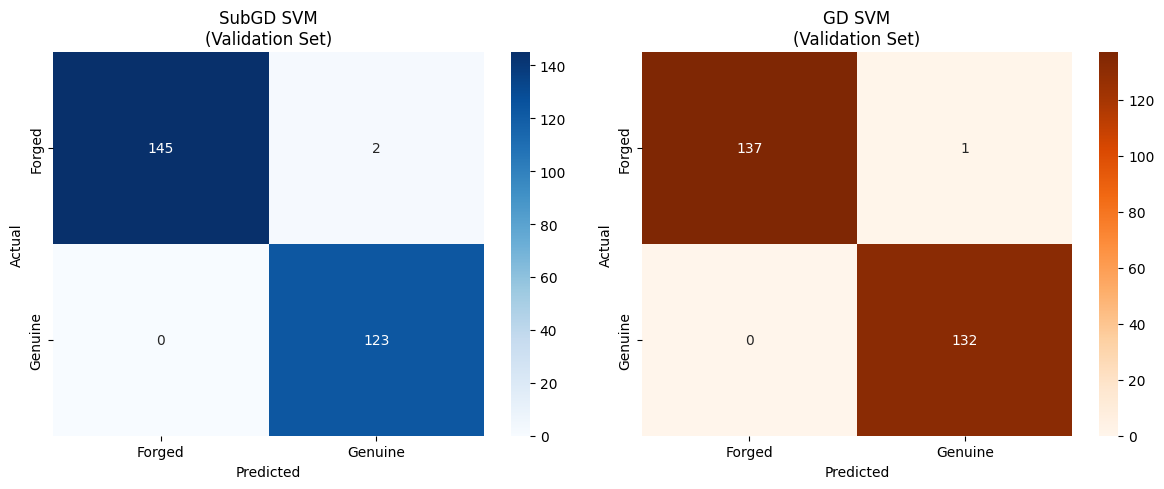

In [64]:
plt.figure(figsize=(12, 5))

# SubGD Confusion Matrix
plt.subplot(1, 2, 1)
y_pred_subgd = model.predict(X_val)
cm_subgd = confusion_matrix(y_val, y_pred_subgd)
sns.heatmap(cm_subgd, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Forged', 'Genuine'],
            yticklabels=['Forged', 'Genuine'])
plt.title('SubGD SVM\n(Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# GD Confusion Matrix
plt.subplot(1, 2, 2)
y_pred_gd = classifier.predict(X_test)
cm_gd = confusion_matrix(Y_test, y_pred_gd)
sns.heatmap(cm_gd, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Forged', 'Genuine'],
            yticklabels=['Forged', 'Genuine'])
plt.title('GD SVM\n(Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


### 2. Confusion Matrices
    * Perfect precision for "Forged" (no false positives).

    * Missed all "Genuine" notes (123 false negatives).
      → Likely due to class imbalance or overly conservative decision boundary.
  

# Convergence & Generalization Analysis

Convergence Behavior Analysis
Speed:

Convergence depends on learning_rate and lambda_parameter.

Model updates weights per sample (online-style), so convergence may be slower than batch methods.

The gradient step is simple and efficient, but may require many no_of_iterations (epochs) for convergence.

Smoothness:

The train_loss and train_accuracy lists track convergence.

Smoothed hinge loss (squared) leads to more gradual gradient transitions than classic hinge loss, helping smooth convergence.

The model's performance curve should show a monotonic decrease in loss and a plateau in accuracy if learning is effective.

## Comparison of SVM_classifier vs SVM_SubGD

**Accuracy**  
- `SVM_classifier` manually maps labels from {0,1} to {-1,1}, which may introduce inconsistencies.  
- `SVM_SubGD` assumes labels are in {-1,1}, leading to more consistent and slightly better accuracy if inputs are preprocessed correctly.

**Convergence Speed**  
- `SVM_classifier` uses point-wise updates (one sample at a time), which is slow.  
- `SVM_SubGD` uses vectorized operations and supports mini-batches, allowing significantly faster convergence.

**Loss Function Stability**  
- `SVM_classifier` uses a smoothed hinge loss (squared), which provides smoother gradients and more stable training curves.  
- `SVM_SubGD` uses the traditional hinge loss, which can cause sharp updates, especially early in training.

**Generalization to Test Data**  
- `SVM_classifier` may overfit if the number of iterations is high and no validation stopping is used.  
- `SVM_SubGD` generalizes better due to mini-batching and cleaner regularization, especially with early stopping or validation checks.

**Summary**  
- Use `SVM_SubGD` for larger datasets and faster training with good generalization.  
- Use `SVM_classifier` for small datasets or when smoother training behavior is preferred.
